In [28]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
xs = -2
xe = 2
ys = -1
ye = 1
xtics = 11
ytics = 11
num_p = 2001
x,y = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))
nanj = np.complex128(np.nan+(np.nan)*1j)

In [30]:
z = x + y*1j
# z = points
iters = np.ones(z.shape)*np.inf

In [31]:
z = z[::-1]
print(z[0][0])

(-2+1j)


In [32]:
num_iter = 10000
limit = 2
c =  -0.8 + 0.156j

for i in range(1, num_iter+2):
    z = np.square(z) + c
    np.nan_to_num(z, copy=False, posinf=True)
    # z = np.square(z) + c
    cond = i/(np.abs(z)>=limit)
    iters = np.minimum(cond, iters)

<ipython-input-32-8b807d9c22f7>:9: RuntimeWarning: divide by zero encountered in true_divide
  cond = i/(np.abs(z)>=limit)
<ipython-input-32-8b807d9c22f7>:6: RuntimeWarning: overflow encountered in square
  z = np.square(z) + c
<ipython-input-32-8b807d9c22f7>:6: RuntimeWarning: invalid value encountered in square
  z = np.square(z) + c
<ipython-input-32-8b807d9c22f7>:9: RuntimeWarning: overflow encountered in absolute
  cond = i/(np.abs(z)>=limit)


In [33]:
print(np.max(iters))
print(np.min(iters))
print(np.isnan(z[500][500]))

print(np.abs(z[0][0])>2)

2156.0
1.0
False
True


In [34]:
rangex = np.linspace(0, num_p, xtics).tolist()
rangex = [int(x) for x in rangex]
rangey = np.linspace(0, num_p, ytics).tolist()
rangey = [int(y) for y in rangey]
tics_x = np.linspace(xs, xe, xtics).tolist()
tics_x = [round(x, 2) for x in tics_x]
tics_y = np.linspace(ys, ye, ytics).tolist()
tics_y = [round(y, 2) for y in tics_y]

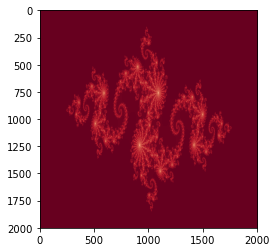

In [35]:
iters[iters == np.inf] = np.NINF
im = plt.imshow(iters,cmap=plt.cm.RdBu)
plt.axis("off")

[]

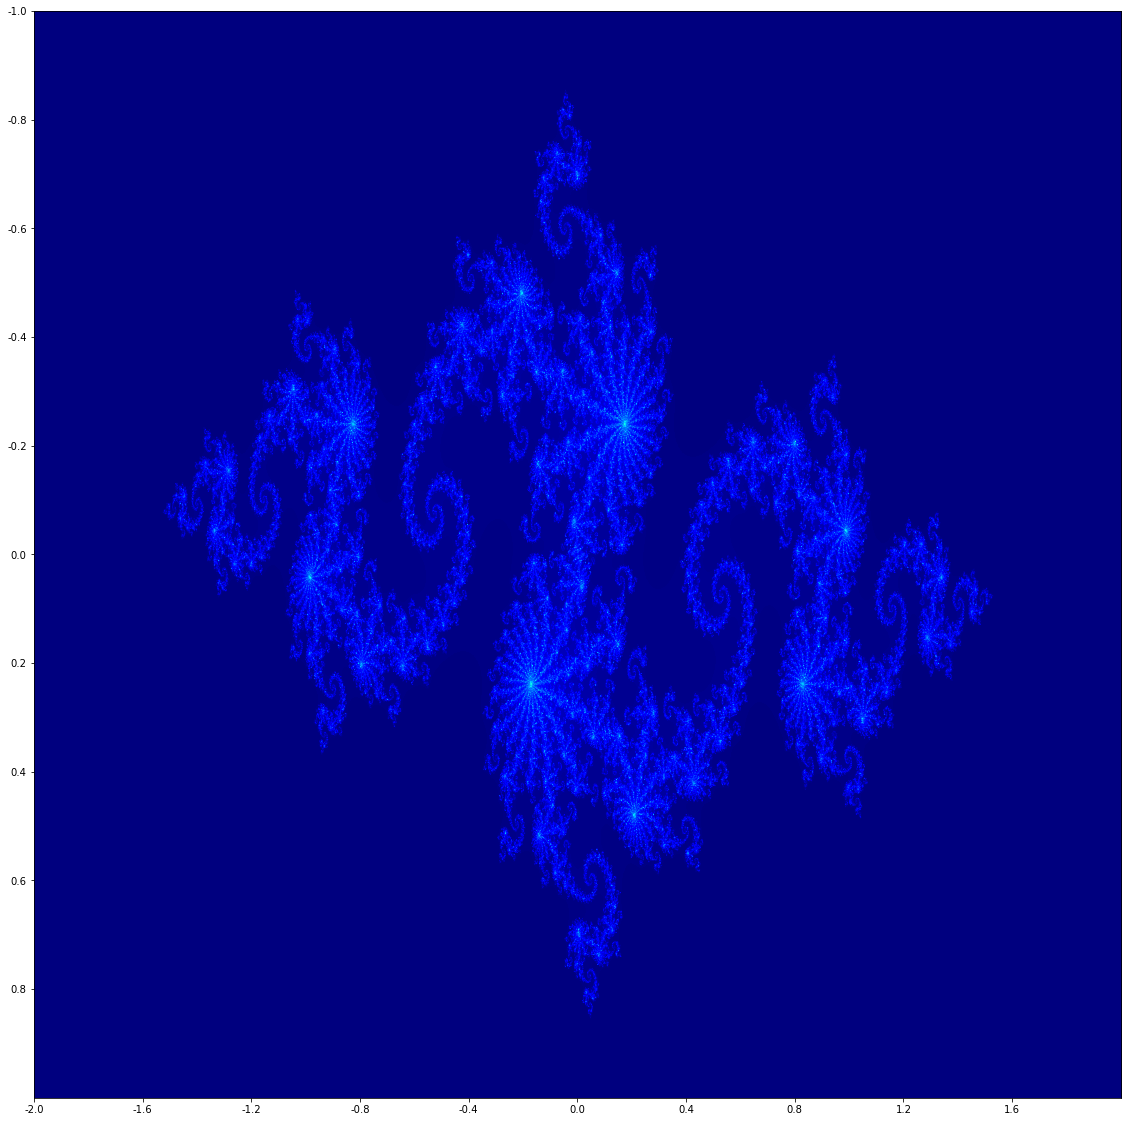

In [43]:
fig, ax = plt.subplots(figsize=(40, 20))
iters[iters == np.NINF] = np.max(iters)+100
ax.imshow(iters,cmap=plt.cm.jet)
plt.axis("off")
plt.plot()

[]

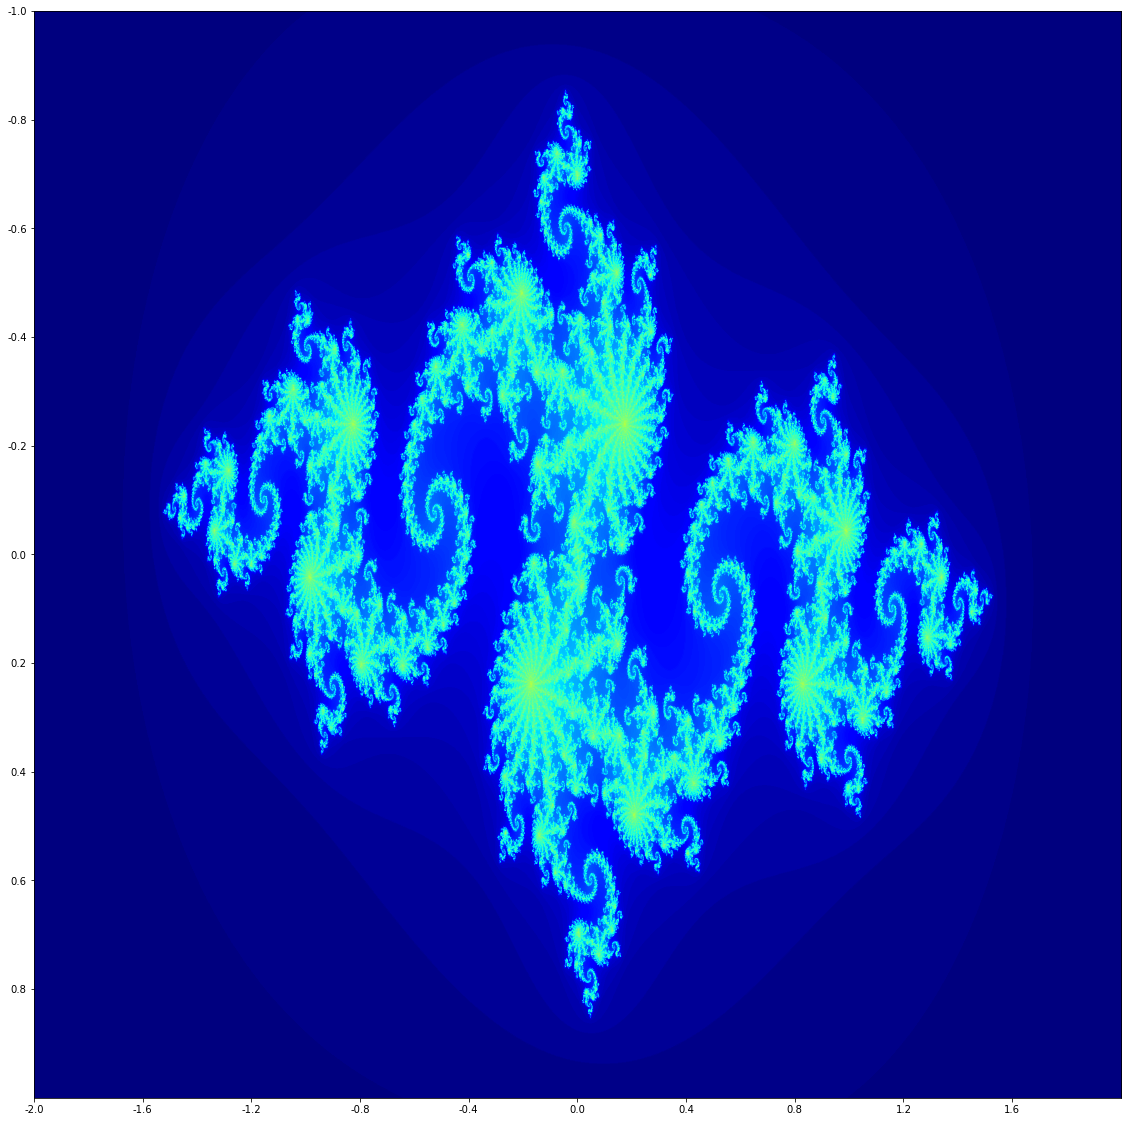

In [52]:
logs = np.log10(iters+10)
logs[logs == np.max(logs)] = np.max(logs) + 1
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(logs,cmap=plt.cm.jet)
plt.xticks(rangex, tics_x)
plt.yticks(rangey, tics_y)
plt.plot()